# Péndulo doble
Se va a empezar a resolver el problema del péndulo doble. Se establecen las condiciones base que serían una cuerda que se mantiene a longitud constante y dos masas puntuales de misma magnitud. Por lo tanto, se tienen que definir las posiciones en el sistema de coordenadas.
$$
r_{1} = L_{1} \cdot (sin(\theta _{1}), cos(\theta _{1})) \\
r_{2} = r_{1} + L_{2} \cdot (sin(\theta _{2}), cos(\theta _{2}))
$$

Donde los ángulos son los creados con el punto de inicio de la cuerda, en el caso de la primera masa sería el techo y en el de la segunda sería con respecto el final de la primera masa. 

## Energía cinética del sistema
La energía cinética del sistema seguiría el siguiente formato:
$$
k_{1} = \frac{1}{2} m {v_{1}}^{2} \\
k_{2} = \frac{1}{2} m {v_{2}}^{2} 
$$
Donde se definen las velocidades como la derivada con respecto al tiempo de la posición de cada objeto. Importante mencionar que la energía cinética queda como una sola expresión debido al producto punto.

## Energía potencial del sistema
La energía potencial del sistema seguiría el siguiente formato:
$$
U_{1} = L_{1} \cdot cos(\theta _{1}) \cdot m \cdot g \\
U_{2} = (L_{1} \cdot cos(\theta _{1}) + L_{2} \cdot cos(\theta _{2})) \cdot m \cdot g 
$$

## Lagrangiano del sistema
Se va a buscar plantear la ecuación de movimiento con base en el Lagrangiano del sistema y las derivadas, en este caso se va a definir como $$ L = T - U $$, donde T es la energía traslacional del sistema.

In [278]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as plt_animation
import scipy as sp
import scienceplots
from scipy.integrate import odeint

In [279]:
m1,m2, L1, L2, t, g = smp.symbols(r'm_1,m_2, L_1, L_2, t, g')
x, y, theta1, theta2 = smp.symbols(r'x, y, \theta_1 , \theta_2', cls = smp.Function)
x = x(t)
y = y(t)
theta1 = theta1(t)
theta2 = theta2(t)
theta1_ddot = smp.diff(theta1,t,t)
theta2_ddot = smp.diff(theta2,t,t)

In [280]:
# Velocidad cuadrada de cada objeto
def squared_velocity(position_x, position_y):
    return smp.diff(position_x,t)**2 + smp.diff(position_y,t)**2

In [281]:
# Objeto 1
x1 = L1*smp.sin(theta1)
y1 = -L1*smp.cos(theta1)
k1 = smp.Rational(1,2)*m1*squared_velocity(x1,y1)
U1 = m1*y1*g

# Objeto 2
x2 = x1 + L2*smp.sin(theta2)
y2 = y1 - L2*smp.cos(theta2)
k2 = smp.Rational(1,2)*m2*squared_velocity(x2,y2)
U2 = m2*y2*g

In [282]:
L = k1+k2 - (U1 + U2)
L

L_1*g*m_1*cos(\theta_1(t)) - g*m_2*(-L_1*cos(\theta_1(t)) - L_2*cos(\theta_2(t))) + m_1*(L_1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L_1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2)/2 + m_2*((L_1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L_2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L_1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L_2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)/2

In [283]:
L = L.simplify()
L

L_1**2*m_1*Derivative(\theta_1(t), t)**2/2 + L_1*g*m_1*cos(\theta_1(t)) + g*m_2*(L_1*cos(\theta_1(t)) + L_2*cos(\theta_2(t))) + m_2*(L_1**2*Derivative(\theta_1(t), t)**2 + 2*L_1*L_2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L_2**2*Derivative(\theta_2(t), t)**2)/2

## Ecuación de Euler-Lagrange
La ecuación se define cómo:
$$
\frac{d}{dt} \frac{\partial L}{\partial \dot{q_{i}}} - \frac{\partial L}{\partial q_{i}} = 0
$$
Con una sumatoria en la notación de Einstein, por lo tanto se tiene que plantear para que theta que se ha usado, en este caso solo 2.


## Ángulo 1
$$
\frac{d}{dt} \frac{\partial L}{\partial \dot{\theta}_{1}} - \frac{\partial L}{\partial \theta_{1}} = 0
$$

In [284]:
# Derivada del Lagrangiano con respecto theta1 prima
dLtheta1_prim = smp.diff(L,smp.diff(theta1,t)).simplify()
# Derivada de la expresión anterior con respecto el tiempo
ddLdttheta1_prim = smp.diff(dLtheta1_prim,t).simplify()
# Derivada del Lagrangiano con respecto theta1
dLdtheta1 = smp.diff(L,theta1).simplify()

In [285]:
# Se plantea la ecuación de Euler-Lagrange como tal
eq_theta1 = (ddLdttheta1_prim - dLdtheta1).simplify()
eq_theta1

L_1*(L_1*m_1*Derivative(\theta_1(t), (t, 2)) + L_1*m_2*Derivative(\theta_1(t), (t, 2)) + L_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + L_2*m_2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) + g*m_1*sin(\theta_1(t)) + g*m_2*sin(\theta_1(t)))

## Ángulo 2
$$
\frac{d}{dt} \frac{\partial L}{\partial \dot{\theta}_{2}} - \frac{\partial L}{\partial \theta_{2}} = 0
$$

In [286]:
# Derivada del Lagrangiano con respecto theta2 prima
dLtheta2_prim = smp.diff(L,smp.diff(theta2,t)).simplify()
# Derivada de la expresión anterior con respecto el tiempo
ddLdttheta2_prim = smp.diff(dLtheta2_prim,t).simplify()
ddLdttheta2_prim
# Derivada del Lagrangiano con respecto theta1
dLdtheta2 = smp.diff(L,theta2).simplify()

In [287]:
# Se plantea la ecuación de Euler-Lagrange como tal
eq_theta2 = (ddLdttheta2_prim - dLdtheta2).simplify()
eq_theta2

L_2*m_2*(-L_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L_1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) + L_2*Derivative(\theta_2(t), (t, 2)) + g*sin(\theta_2(t)))

In [288]:
sol = smp.solve([eq_theta1,eq_theta2], (theta1_ddot,theta2_ddot)) 

In [289]:
sol_theta1 = sol[theta1_ddot].simplify()
sol_theta1

(-L_1*m_2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_1(t), t)**2/2 - L_2*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - g*m_1*sin(\theta_1(t)) - g*m_2*sin(\theta_1(t) - 2*\theta_2(t))/2 - g*m_2*sin(\theta_1(t))/2)/(L_1*(m_1 - m_2*cos(\theta_1(t) - \theta_2(t))**2 + m_2))

In [290]:
sol_theta2 = sol[theta2_ddot].simplify()
sol_theta2

(L_1*m_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L_1*m_2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + L_2*m_2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_2(t), t)**2/2 + g*m_1*sin(2*\theta_1(t) - \theta_2(t))/2 - g*m_1*sin(\theta_2(t))/2 + g*m_2*sin(2*\theta_1(t) - \theta_2(t))/2 - g*m_2*sin(\theta_2(t))/2)/(L_2*(m_1 - m_2*cos(\theta_1(t) - \theta_2(t))**2 + m_2))

In [291]:
theta1_dot = smp.diff(theta1,t)
theta2_dot = smp.diff(theta2,t)

In [292]:
sol_theta1_num = smp.lambdify([t,g,L1,L2,m1,m2,theta1,theta1_dot,theta2,theta2_dot],sol_theta1)

In [293]:
sol_theta2_num = smp.lambdify([t,g,L1,L2,m1,m2,theta1,theta1_dot,theta2,theta2_dot],sol_theta2)

In [294]:
theta1_dot_num = smp.lambdify([theta1_dot], theta1_dot)
theta2_dot_num = smp.lambdify([theta2_dot], theta2_dot)

## Condiciones iniciales del sistema

In [295]:
# Cuerpo 1
m1_num = 2
L1_n = 2 # Longitud de la cuerda
theta1_0 = 5 # Angulo pequeño inicial
omega1_0 = 0 # Frecuencia angular inicial (theta punto)

# Cuerpo 2
m2_num = 1
L2_n = 3 # Largo de la cuerda 2
theta2_0 = 10 # Angulo inicial, mismo angulo ara simplificar la solucion
omega2_0 = 0 # Frecuencia angular inicial (theta punto)

# Constantes generales
g_num = 9.81 # gravedad

# Periodo de tiempo
t_n = np.linspace(0,40,1001) # Un minuto con espaciado de un segundo

In [296]:
# Se va a resolver el sistema con ODEINT de scipy, entonces se necesita usar una funcion que genere la derivada
def derivative(S, t,g,L1,L2,m1,m2):
    [theta1, omega1, theta2, omega2] = S
    return [theta1_dot_num(omega1), 
            sol_theta1_num(t,g,L1,L2,m1,m2,theta1,omega1, theta2, omega2),
            theta2_dot_num(omega2), 
            sol_theta2_num(t,g,L1,L2,m1,m2,theta1,omega1, theta2, omega2)]

In [297]:
final_sol = odeint(derivative, y0=[theta1_0, omega1_0, theta2_0, omega2_0], t = t_n, args = (g_num, L1_n, L2_n, m1_num, m2_num))

In [298]:
theta1_num = final_sol.T[0]
theta2_num = final_sol.T[2]
final_sol.T[0],final_sol.T[2]

(array([5.        , 5.00365785, 5.0146167 , ..., 5.81601296, 5.85218015,
        5.8869861 ]),
 array([10.        , 10.00073579, 10.00299683, ..., 22.2786039 ,
        22.39745513, 22.51839665]))

In [299]:
def get_x1y1x2y2(t_n,th1,th2, L1,L2):
    return (L1*np.sin(th1),
            -L1*np.cos(th1),
            L1*np.sin(th1) + L2*np.sin(th2),
            -L1*np.cos(th1)-L2*np.cos(th2))

x1_n , y1_n, x2_n , y2_n = get_x1y1x2y2(t_n,theta1_num, theta2_num, L1_n, L2_n) 

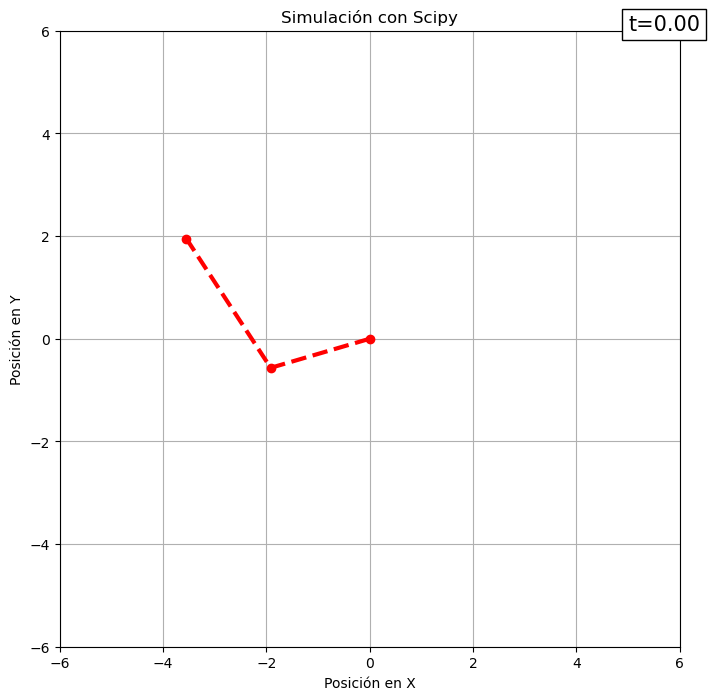

In [300]:
def animete(i):
    ln1.set_data([0, x1_n[i],x2_n[i]], [0, y1_n[i], y2_n[i]])
    time_text.set_text('t={:.2f}'.format(i/len(t_n[t_n<1])))

plt.style.use(["default"])
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.set_title('Simulación con Scipy')
ax.grid()
ln1, = plt.plot([],[], 'ro--', lw = 3)
time_text = ax.text(5,6,'',fontsize = 15 , bbox=dict(facecolor = 'white', edgecolor = "black"))
ax.set_xlabel("Posición en X")
ax.set_ylabel("Posición en Y")
ax.set_ylim(-6,6)
ax.set_xlim(-6,6)
ani = plt_animation.FuncAnimation(fig, animete, frames = 1000, interval = 50)
ani.save("double-pendulum-MS-B.gif",writer= "pillow", fps =len(t_n[t_n<1]))

# POO
Se va a volver a escribir el código en el paradigma de programación orientada a objetos.

In [250]:
class pendulum():
    def __init__(self, length, mass, theta_0, omega_0,t):
        self.L_num = length
        self.m_num = mass
        self.L = smp.symbols(f"L_{id(self)}")
        self.m = smp.symbols(f"m_{id(self)}")
        self.t = t
        self.theta = smp.Function(f'theta_{id(self)}')(self.t)
        self.omega = smp.Function(f'omega_{id(self)}')(self.t)
    def relative_position(self):
        # Nota: Esta es la posición con respecto la masa anterior, a la hora de expandirlo
        # se tiene que sumar la posición de las masas anteriores
        x = self.L*smp.sin(self.theta)
        y = -self.L*smp.cos(self.theta)
        return x,y

In [270]:
class N_pendulum_system():
    def __init__(self, g = 9.81):
        self.masses = [] # list of all the instances of class Pendulum
        self.g_num = g  # gravity
        self.g = smp.symbols(r"g")
        
    def add_mass(self, length, mass, theta_0, omega_0,t):
        self.masses.append(pendulum(length, mass, theta_0, omega_0,t))
        
    def lagrangian(self):
        kinetic = 0
        potential = 0
        position_x = 0
        position_y = 0
        for mass in self.masses:
            temp_x, temp_y = mass.relative_position() 
            position_x += temp_x
            position_y += temp_y
            kinetic += smp.Rational(1,2)*mass.m*(smp.diff(position_x,mass.t)**2 + smp.diff(position_y,mass.t)**2)
            potential += position_y*mass.m*self.g
        kinetic = kinetic.simplify()
        potential = potential.simplify()
        return (kinetic - potential).simplify()
    
    def euler_lagrange(self):
        L = self.lagrangian()
        equations = []
        for mass in self.masses:
            # Derivada del Lagrangiano con respecto theta2 prima
            dLtheta_prim = smp.diff(L,smp.diff(mass.theta,mass.t)).simplify()
            # Derivada de la expresión anterior con respecto el tiempo
            ddLdttheta_prim = smp.diff(dLtheta_prim,mass.t).simplify()
            # Derivada del Lagrangiano con respecto theta1
            dLdtheta = smp.diff(L,mass.theta).simplify()
            equations.append((ddLdttheta_prim - dLdtheta).simplify())
        return equations
    
    def simulate(self,t_n,initial_conditions):
        equations = self.euler_lagrange()
        # Hay que establecer las segundas derivadas de los thetas en simbolos
        thetas_ddot = [smp.diff(mass.theta,mass.t,mass.t) for mass in self.masses]
        thetas_dot = [smp.diff(mass.theta,mass.t) for mass in self.masses]
        gen_sol = smp.solve(equations, thetas_ddot, rational = False)
        # Famous lambdify
        num_solutions = []
        for theta_ddot in thetas_ddot:
            num_solutions.append(
                smp.lambdify([self.masses[0].t] + [self.g] + 
                             [mass.theta for mass in self.masses] + 
                             [mass.L for mass in self.masses] + 
                             [mass.m for mass in self.masses] +
                             [smp.diff(mass.theta,mass.t) for mass in self.masses], 
                             gen_sol[theta_ddot], modules=["numpy"]))
        # Definir la funcion de derivada
        thetas_dot_num = [smp.lambdify([theta_dot], theta_dot) for theta_dot in thetas_dot]
        def derivative(S, t, g, *mass_params):
            # Split state vector into angles and angular velocities
            n = int(len(mass_params)/2)
            thetas = S[:n]
            omegas = S[n:]
            # Evaluate the accelerations
            theta_ddots = [
                f(
                    t, g, *thetas, *mass_params, *omegas
                ) 
                for f in num_solutions
            ]
            return [*omegas, *theta_ddots]
        # Have to extract the values from the object mass in every element of masses
        params = [mass.L_num for mass in self.masses] + [mass.m_num for mass in self.masses]
        result = odeint(
            derivative,
            y0=initial_conditions,
            t = t_n, 
            args = (self.g_num, *params))
        return result

In [306]:
# Create a system with three pendulums
n_pendulum = N_pendulum_system()
# Add pendulums to the system
t = smp.symbols(r"t")
n_pendulum.add_mass(2, 2, 5, 0,t)
n_pendulum.add_mass(1, 1, 3, 0,t)
n_pendulum.add_mass(1, 1, 5, 0,t)
# Time for simulation
t_n = np.linspace(0, 40, 1001)

# Initial conditions: [theta1, theta2, omega1, omega2, ...]
initial_conditions = [5, 3, 5, 0, 0, 0]
# Simulate
solution = n_pendulum.simulate(t_n, initial_conditions)

In [307]:
solution.T

array([[ 5.00000000e+00,  5.00392167e+00,  5.01568805e+00, ...,
         7.19151596e+00,  7.05067246e+00,  6.91775551e+00],
       [ 3.00000000e+00,  3.00230353e+00,  3.00939454e+00, ...,
        -3.68262381e+01, -3.66640751e+01, -3.65771919e+01],
       [ 5.00000000e+00,  5.00063849e+00,  5.00259681e+00, ...,
        -5.60744335e+01, -5.57633181e+01, -5.54017823e+01],
       [ 0.00000000e+00,  1.96089905e-01,  3.92241162e-01, ...,
        -3.49491845e+00, -3.47640793e+00, -3.13707813e+00],
       [ 0.00000000e+00,  1.15929450e-01,  2.40868027e-01, ...,
         4.83299772e+00,  3.12793064e+00,  1.33222341e+00],
       [ 0.00000000e+00,  3.21042407e-02,  6.63392497e-02, ...,
         6.82995395e+00,  8.60650525e+00,  9.22661461e+00]])

In [308]:
theta1_n = solution.T[0]
z1_n = solution.T[2]
theta2_n = solution.T[1]
z2_n = solution.T[3]

In [304]:
def get_x1y1x2y2(t,th1,th2, L1,L2):
    return (L1*np.sin(th1),
            -L1*np.cos(th1),
            L1*np.sin(th1) + L2*np.sin(th2),
            -L1*np.cos(th1)-L2*np.cos(th2))

x1_n , y1_n, x2_n , y2_n = get_x1y1x2y2(t_n, theta1_n, theta2_n, 2, 1) 

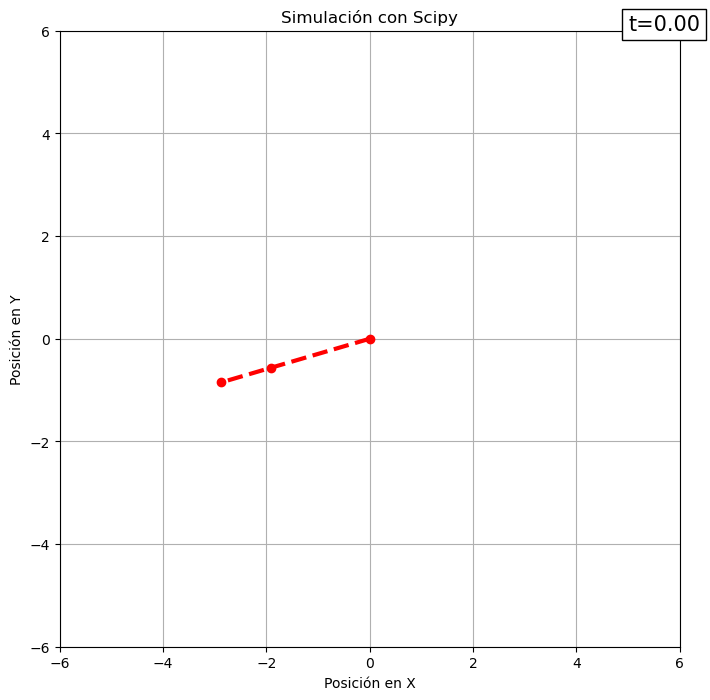

In [305]:
def animete(i):
    ln1.set_data([0, x1_n[i],x2_n[i]], [0, y1_n[i], y2_n[i]])
    time_text.set_text('t={:.2f}'.format(i/len(t_n[t_n<1])))

plt.style.use(["default"])
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.set_title('Simulación con Scipy')
ax.grid()
ln1, = plt.plot([],[], 'ro--', lw = 3)
time_text = ax.text(5,6,'',fontsize = 15 , bbox=dict(facecolor = 'white', edgecolor = "black"))
ax.set_xlabel("Posición en X")
ax.set_ylabel("Posición en Y")
ax.set_ylim(-6,6)
ax.set_xlim(-6,6)
ani = plt_animation.FuncAnimation(fig, animete, frames = 1000, interval = 50)
ani.save("test.gif",writer= "pillow", fps =len(t_n[t_n<1]))